##*Install Requaired Pakages*

In [1]:
#install youtube transcript api
!pip install -q youtube-transcript-api

#install google generativeai
!pip install google-generativeai

#install fpdf for working on pdf
!pip install fpdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.1/485.1 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=98eaab1c54096538e11bc06f4fbc7a0b8feb1f75f3db5a219220bf6b2e476e7f
  Stored in directory: /root/.cache/pip/wheels/6e/62/11/dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf


##*Import Libraries*

In [2]:
#============= Import libraries =================
import os
from urllib.parse import urlparse, parse_qs
from youtube_transcript_api import YouTubeTranscriptApi
from google.colab import userdata
import google.generativeai as genai
from IPython.display import Markdown, display

from fpdf import FPDF
import PIL.Image
from PIL import Image


##*Set API Key*

In [3]:
# =================== Set API KEy ======================
from google.colab import userdata
import google.generativeai as genai
#set API key
GOOGLE_API_KEY = userdata.get('api')
genai.configure(api_key=GOOGLE_API_KEY)

##*Video to Text summarize*

In [ ]:
# ============= PROMPT 1: Sammarize Youtube video into text===============

# Install required package
!pip install -q youtube-transcript-api

# Import libraries
import os
from urllib.parse import urlparse, parse_qs
from youtube_transcript_api import YouTubeTranscriptApi
from google.colab import userdata
import google.generativeai as genai

# Prompt definition
prompt = """You are an expert YouTube video summarizer.

Your task:
- Take the transcript of the provided YouTube video and summarize it in under **250 words**.
- Structure the output clearly with **bold headings** and **bullet points**.
- Keep the tone simple, clear, and informative.
- Avoid unnecessary greetings or filler text.
- The final summary should include:
  - **Main Idea / Overview**
  - **Key Points Discussed**
  - **Important Insights or Lessons**
  - **Conclusion / Takeaway**

Now summarize the video content from this transcript: """

# Extract video ID
def get_video_id(youtube_url):
    parsed_url = urlparse(youtube_url)
    if parsed_url.hostname == "youtu.be":
        return parsed_url.path.lstrip("/")
    query_params = parse_qs(parsed_url.query)
    return query_params.get("v", [None])[0]

# Get transcript
def extract_transcript_details(video_id):
    try:
        ytt_api = YouTubeTranscriptApi()
        # Optional: specify preferred language(s)
        fetched = ytt_api.fetch(video_id, languages=['en'])
        # fetched is iterable; join the text
        transcript = " ".join([snippet.text for snippet in fetched])
        return transcript
    except Exception as e:
        print(f"Transcript Error: {e}")
        return None

# Generate Gemini content
def generate_gemini_content(transcript_text, prompt):
    model = genai.GenerativeModel("gemini-2.5-pro")
    response = model.generate_content(prompt + transcript_text)
    return response.text

# Colab Input
youtube_link = input("Enter YouTube Video Link: ")

if youtube_link:
    video_id = get_video_id(youtube_link)
    if not video_id:
        print("Invalid YouTube link.")
    else:
        print(f"Video ID: {video_id}")
        transcript_text = extract_transcript_details(video_id)
        if transcript_text:
            summary = generate_gemini_content(transcript_text, prompt)
            print("\n## Detailed Notes:")
            print(summary)


Enter YouTube Video Link: https://www.youtube.com/watch?v=7nb3gdchiKA&t=49s
Video ID: 7nb3gdchiKA

## Detailed Notes:
### **Main Idea / Overview**

This video tells a short story about a wise old lady who explains the secret to her constant happiness. She teaches a young man, and eventually her entire village, that true happiness is not dependent on external circumstances but is an internal choice that can be cultivated through a positive mindset and daily gratitude.

### **Key Points Discussed**

*   A young man asks a perpetually happy old lady why she is never sad, even when things go wrong.
*   The lady explains that happiness comes from within and shares a personal story of losing her husband.
*   After a period of grief, she realized she needed to choose happiness for herself and her children.
*   Her method is to start each day by deciding to find something to be happy about, no matter how small.
*   When bad things happen, she reminds herself, "This too will pass," and focuses 

##*Text to Text summarize*

In [ ]:
# ========= PROMPT 2: Sammarize text to text ================

#prompt defination
prompt = """
Summarize the given paragraph in under 500 words in points.
Keep it concise, meaningful, and easy to understand:
"""

# Generate Gemini content
def generate_gemini_content(transcript_text, prompt):
    model = genai.GenerativeModel("gemini-2.5-pro")
    response = model.generate_content(prompt + transcript_text)
    return response.text

# Colab Input
user_text = input("Enter text: ")

if user_text:
            summary = generate_gemini_content(user_text, prompt)
            print("\n## Detailed Notes:")
            display(Markdown(summary))



Enter text: Model Information The Meta Llama 3.1 collection of multilingual large language models (LLMs) is a collection of pretrained and instruction tuned generative models in 8B, 70B and 405B sizes (text in/text out). The Llama 3.1 instruction tuned text only models (8B, 70B, 405B) are optimized for multilingual dialogue use cases and outperform many of the available open source and closed chat models on common industry benchmarks.  Model developer: Meta  Model Architecture: Llama 3.1 is an auto-regressive language model that uses an optimized transformer architecture. The tuned versions use supervised fine-tuning (SFT) and reinforcement learning with human feedback (RLHF) to align with human preferences for helpfulness and safety.  Training Data	Params	Input modalities	Output modalities	Context length	GQA	Token count	Knowledge cutoff Llama 3.1 (text only)	A new mix of publicly available online data.	8B	Multilingual Text	Multilingual Text and code	128k	Yes	15T+	December 2023 70B	Mul

Here is a summary of the Meta Llama 3.1 model information:

*   **What it is:** Llama 3.1 is a new family of multilingual Large Language Models (LLMs) developed by Meta.

*   **Model Sizes:** It is available in three sizes: 8B, 70B, and 405B parameters.

*   **Primary Use Case:** The instruction-tuned models are optimized for multilingual dialogue and are designed to outperform many existing open-source and closed models.

*   **Architecture and Training:**
    *   It uses an optimized transformer architecture.
    *   Tuned versions are refined using Supervised Fine-Tuning (SFT) and Reinforcement Learning with Human Feedback (RLHF) to align with user preferences for helpfulness and safety.

*   **Key Specifications:**
    *   **Training Data:** Trained on over 15 trillion (15T+) tokens from a mix of publicly available online data.
    *   **Knowledge Cutoff:** The model's knowledge is current up to December 2023.
    *   **Context Length:** It supports a large context length of 128,000 tokens.
    *   **Capabilities:** It takes multilingual text as input and can generate both multilingual text and code.
    *   **Supported Languages:** English, German, French, Italian, Portuguese, Hindi, Spanish, and Thai.

*   **Release and Status:**
    *   **Release Date:** July 23, 2024.
    *   **Status:** It is a static model trained on an offline dataset. Meta plans to release future versions with improved safety based on community feedback.

In [ ]:
# ========= PROMPT 2: Sammarize text to text =================

# Import libraries
from google.colab import userdata
import google.generativeai as genai
from IPython.display import Markdown, display

#set API key
GOOGLE_API_KEY = userdata.get('api')
genai.configure(api_key=GOOGLE_API_KEY)

#prompt defination
prompt = """
Summarize the given paragraph in under 500 words in points.
Keep it concise, meaningful, and easy to understand:
"""

# Generate Gemini content
def generate_gemini_content(transcript_text, prompt):
    model = genai.GenerativeModel("gemini-2.5-pro")
    response = model.generate_content(prompt + transcript_text)
    return response.text

# Colab Input
user_text = input("Enter text: ")

if user_text:
            summary = generate_gemini_content(user_text, prompt)
            print("\n## Detailed Notes:")
            display(Markdown(summary))

Enter text: Model Information The Llama 3.2 collection of multilingual large language models (LLMs) is a collection of pretrained and instruction-tuned generative models in 1B and 3B sizes (text in/text out). The Llama 3.2 instruction-tuned text only models are optimized for multilingual dialogue use cases, including agentic retrieval and summarization tasks. They outperform many of the available open source and closed chat models on common industry benchmarks.  Model Developer: Meta  Model Architecture: Llama 3.2 is an auto-regressive language model that uses an optimized transformer architecture. The tuned versions use supervised fine-tuning (SFT) and reinforcement learning with human feedback (RLHF) to align with human preferences for helpfulness and safety.  Training Data	Params	Input modalities	Output modalities	Context Length	GQA	Shared Embeddings	Token count	Knowledge cutoff Llama 3.2 (text only)	A new mix of publicly available online data.	1B (1.23B)	Multilingual Text	Multiling

ERROR:tornado.access:503 POST /v1beta/models/gemini-2.5-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (::1) 3214.58ms



## Detailed Notes:


Here is a summary of the Llama 3.2 model information in points:

**Overview**
*   **What it is:** Llama 3.2 is a collection of multilingual, open-source large language models (LLMs) created by Meta.
*   **Sizes:** The models are available in small, efficient sizes of 1B and 3B parameters.
*   **Primary Use:** They are optimized for multilingual dialogue, agentic retrieval, and summarization tasks, outperforming many other available models.

**Technical Specifications**
*   **Architecture:** It uses an optimized, auto-regressive transformer architecture. The instruction-tuned versions are aligned for helpfulness and safety using SFT and RLHF.
*   **Context Length:** The standard models support a very large context length of 128,000 tokens, while quantized versions support 8,000 tokens.
*   **Training Data:** Trained on a new mix of publicly available online data, amounting to as many as 9 trillion tokens.
*   **Knowledge Cutoff:** The model's knowledge is current up to **December 2023**.
*   **Efficiency:** All versions use Grouped-Query Attention (GQA) to improve inference speed and scalability.

**Language Support**
*   **Officially Supported:** English, German, French, Italian, Portuguese, Hindi, Spanish, and Thai.
*   **Extensibility:** The model was trained on a broader set of languages, and developers can fine-tune it for other languages not on the official list.

**Release Information**
*   **Release Date:** September 25, 2024.
*   **Model Status:** This is a static model trained on an offline dataset, meaning its knowledge is fixed and not updated in real-time.

In [ ]:
# ========= PROMPT 2: Sammarize text to text =================

# Import libraries
from google.colab import userdata
import google.generativeai as genai
from IPython.display import Markdown, display

#set API key
GOOGLE_API_KEY = userdata.get('api')
genai.configure(api_key=GOOGLE_API_KEY)

#prompt defination
prompt = """
Summarize the given paragraph in under 500 words in points.
Keep it concise, meaningful, and easy to understand:
"""

# Generate Gemini content
def generate_gemini_content(transcript_text, prompt):
    model = genai.GenerativeModel("gemini-2.5-pro")
    response = model.generate_content(prompt + transcript_text)
    return response.text

# Colab Input
user_text = input("Enter text: ")

if user_text:
            summary = generate_gemini_content(user_text, prompt)
            print("\n## Detailed Notes:")
            display(Markdown(summary))

Enter text: Model Information The Meta Llama 3.3 multilingual large language model (LLM) is an instruction tuned generative model in 70B (text in/text out). The Llama 3.3 instruction tuned text only model is optimized for multilingual dialogue use cases and outperforms many of the available open source and closed chat models on common industry benchmarks.  Model developer: Meta  Model Architecture: Llama 3.3 is an auto-regressive language model that uses an optimized transformer architecture. The tuned versions use supervised fine-tuning (SFT) and reinforcement learning with human feedback (RLHF) to align with human preferences for helpfulness and safety.  Training Data	Params	Input modalities	Output modalities	Context length	GQA	Token count	Knowledge cutoff Llama 3.3 (text only)	A new mix of publicly available online data.	70B	Multilingual Text	Multilingual Text and code	128k	Yes	15T+	December 2023 Supported languages: English, German, French, Italian, Portuguese, Hindi, Spanish, and 

Here is a summary of the provided information about the Meta Llama 3.3 model:

### Model Overview
*   **Model Name**: Meta Llama 3.3
*   **Developer**: Meta
*   **Type**: A 70 billion (70B) parameter, instruction-tuned, multilingual large language model (LLM).
*   **Primary Use Case**: Optimized for multilingual dialogue and designed to outperform many available open-source chat models.

### Key Specifications
*   **Parameters**: 70B
*   **Input/Output**: Accepts multilingual text as input and generates multilingual text and code.
*   **Context Length**: 128k tokens.
*   **Knowledge Cutoff**: December 2023.
*   **Training Data Size**: Trained on over 15 trillion (15T+) tokens from a mix of publicly available data.

### Architecture and Training
*   **Architecture**: Built on an optimized auto-regressive transformer architecture.
*   **Tuning Method**: Uses Supervised Fine-Tuning (SFT) and Reinforcement Learning with Human Feedback (RLHF) to align the model for helpfulness and safety.
*   **Inference Scalability**: Employs Grouped-Query Attention (GQA) to improve performance.

### Supported Languages and Release
*   **Languages**: English, German, French, Italian, Portuguese, Hindi, Spanish, and Thai.
*   **Release Date**: The 70B Instruct version was released on December 6, 2024.
*   **Model Status**: This is a static model trained on an offline dataset. Future versions will be released with safety improvements based on community feedback.

##*Questions/Answers Generator*

In [ ]:
# ========== PROMPT 3: Ask questions with summarize answers to model ================

#prompt defination
prompt = """
You are an Artificial Intelligence expert and teacher.
I am a beginner asking you questions about AI and large language models.

Please follow these response rules:
- Start with a **short, clear definition or explanation** in bold.
- Use simple English that a beginner can easily understand.
- Use proper Markdown formatting:
  - Headings with ##
  - Bullet points (-) and numbered lists (1., 2.) where needed
- Avoid long introductions (no "Hello!" or "That's a good question").
- Keep sections short and organized: Definition, Main Points, and Real-life Examples.
- Keep the overall answer under 500 words.
- Use clean spacing between bullets and headings.
- Do not repeat the same idea in different ways.

Now answer my question clearly and neatly:
"""


# Generate Gemini content
def generate_gemini_content(transcript_text, prompt):
    model = genai.GenerativeModel("gemini-2.5-pro")
    response = model.generate_content(prompt + transcript_text)
    return response.text

# Colab Input
user_text = input("Enter text: ")

if user_text:
     summary = generate_gemini_content(user_text, prompt)
     print("\n## Detailed Notes:")
     display(Markdown(summary))


Enter text: what is ai and its types?

## Detailed Notes:


**Artificial Intelligence (AI) is the science of making computers and machines perform tasks that normally require human intelligence**, such as learning, reasoning, and problem-solving.

### Types of AI

The most common way to categorize AI is by its capability.

-   **Artificial Narrow Intelligence (ANI):** This is the only type of AI we have today. It is designed to perform a single, specific task very well. It operates within a pre-defined range and cannot perform tasks beyond what it was programmed for.

-   **Artificial General Intelligence (AGI):** This is a theoretical type of AI that would have human-level intelligence. An AGI could understand, learn, and apply its knowledge to solve any problem, much like a human being. This type of AI does not yet exist.

-   **Artificial Superintelligence (ASI):** Also theoretical, ASI is a form of AI that would surpass human intelligence and ability in virtually every field. It would be more creative, better at problem-solving, and have superior social skills than any person.

### Real-life Examples

All current examples of AI are a form of Narrow AI.

-   **Voice Assistants:** Siri, Google Assistant, and Alexa use AI to understand your voice commands and perform tasks like setting alarms or searching the web.

-   **Recommendation Engines:** Netflix and YouTube use AI to analyze your viewing habits and suggest movies, shows, or videos you might like.

-   **Navigation Apps:** Google Maps and Waze use AI to analyze real-time traffic data to find the fastest route to your destination.

-   **Email Spam Filters:** Your email service uses AI to learn the patterns of junk mail and automatically move it out of your inbox.

##*Text to PDF summarize*

In [ ]:
# ============ install fpdf for working on pdf ===============
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=bbabd1d6ae681a2f6611275d917ab9476242d103d239f70bffe003ab042496ed
  Stored in directory: /root/.cache/pip/wheels/6e/62/11/dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf


In [ ]:
# ========= PROMPT 4: Create PDF in Cleaned text summarization =====================

from fpdf import FPDF
from IPython.display import Markdown, display

def clean_text(text):
    # Replace unwanted characters like '*' and other special characters
    cleaned_text = text.replace("**", "")  # You can add more characters if needed
    cleaned_text = cleaned_text.replace("*", "")
    cleaned_text = cleaned_text.replace("##", "")
    cleaned_text = cleaned_text.replace("-", "")
    cleaned_text = cleaned_text.replace("##", "")
    return cleaned_text

def save_to_pdf(summary, filename="Text_summary_cleaned.pdf"):
    # Create instance of FPDF class
    pdf = FPDF()

    # Add a page
    pdf.add_page()

    # Set font
    pdf.set_font("Arial", size=12)

    # Add cleaned summary
    pdf.multi_cell(0, 10, txt=summary)

    # Save the pdf with the given name
    pdf.output(filename)

    print(f"PDF saved as {filename}")

# Colab input
transcript_text = input("Enter text for pdf: ")

summary = generate_gemini_content(transcript_text, prompt)

# Clean the text
cleaned_summary = clean_text(summary)

print("\n## Cleaned Notes:")
display(Markdown(cleaned_summary))


# Save the cleaned summary to a PDF
save_to_pdf(cleaned_summary)

Enter text for pdf: **LLMs, or Large Language Models, are powerful AI systems that can understand and generate human-like text. They are trained on massive amounts of text data.**  ## Main Points:  -   LLMs learn patterns and relationships in language. -   They can perform tasks like:     -   Text completion     -   Translation     -   Question answering     -   Summarization  ## Types of LLMs:  1.  **Decoder-only:** Focus on predicting the next word in a sequence. *Example: GPT models* 2.  **Encoder-decoder:** Encode the input and then decode the output. Useful for translation. *Example: T5* 3.  **Encoder-only:** Encode the input into a representation. *Example: BERT*  ## Real-life Examples:  -   **ChatGPT:** A conversational AI chatbot. -   **Google Translate:** Translates text between languages. -   **Grammarly:** Checks grammar and writing style.   PDF saved as AI_Notes_Text_summary.pdf

## Cleaned Notes:


INTRODUCTION TO LARGE LANGUAGE MODELS (LLMS)

Definition
 A Large Language Model (LLM) is a type of artificial intelligence (AI) designed to understand, generate, and interact with human language. These models are called "large" because they are built with a massive number of parameters (billions) and are trained on enormous quantities of text and code from the internet.

Key Points
 LLMs work by learning the patterns, grammar, context, and relationships between words and sentences from the data they are trained on.
 Their primary function is to process an input (a prompt or question) and predict the most probable sequence of words to form a coherent and relevant output.
 The quality of an LLM's response depends on the size and diversity of its training data and the complexity of its internal architecture.
 They do not "understand" language in a human sense but are extremely skilled at statistical pattern matching.

Examples
 Asking an LLM to "explain the water cycle in simple terms" and receiving a clear, paragraphlong explanation.
 Providing the first half of a sentence, "The best way to learn a new skill is," and having the model complete it with a logical conclusion.
 Using an LLM to draft an email or create a story based on a short description.

Conclusion
 LLMs are foundational AI tools that have revolutionized how we interact with information and technology. They act as powerful engines for generating humanlike text, making them useful for a wide range of applications.

CORE CAPABILITIES OF LLMS

Definition
 The core capabilities of an LLM refer to the fundamental tasks it can perform after its training is complete. These are the builtin skills that can be applied to solve various problems without needing to be retrained for each specific task.

Key Points
 Text Generation: Creating original text, from short sentences to long articles, based on a given prompt.
 Question Answering: Providing direct answers to factual questions by retrieving and synthesizing information from its training data.
 Translation: Converting text from one language to another by understanding the context and grammar of both languages.
 Summarization: Condensing a long piece of text into a short, accurate summary while retaining the main points.
 Text Completion: Predicting the next word or phrase in a sentence, which is useful for features like autocomplete.

Examples
 Text Generation: "Write a short poem about the moon."
 Question Answering: "What is the capital of Australia?"
 Translation: "Translate 'Hello, how are you?' into Spanish."
 Summarization: "Summarize the main arguments of the attached news article."
 Text Completion: In your email, you type "I am looking forward to," and the model suggests "hearing from you."

Conclusion
 The versatility of LLMs comes from these core capabilities. By combining and refining them, developers can create specialized applications that assist with everything from creative writing to data analysis.

ARCHITECTURAL TYPES OF LLMS

Definition
 LLMs are built on different underlying structures, known as architectures. These architectures determine how the model processes information and what tasks it is best suited for. The three main types are decoderonly, encoderdecoder, and encoderonly.

Key Points
 Decoderonly Models: These models are designed to generate text. They read an input sequence and predict the next word, one at a time. They are excellent for creative and openended tasks like conversation and writing.
 Encoderdecoder Models: These models have two parts. The encoder reads and "understands" the entire input text. The decoder then uses that understanding to generate an output. This architecture is ideal for tasks that transform an input into a new output, like translation or summarization.
 Encoderonly Models: These models are not designed to generate text. Instead, their strength lies in understanding the context of a given text. They create a detailed numerical representation of the input, which is useful for analysis tasks like sentiment classification or identifying key entities.

Examples
 Decoderonly: GPT3 and ChatGPT are famous examples used for chatbots and content creation.
 Encoderdecoder: T5 and BART are models often used to power language translation and text summarization services.
 Encoderonly: BERT is a wellknown model used for search engine query understanding and sentiment analysis.

Conclusion
 The choice of architecture is critical. Decoderonly models excel at generation, encoderonly models excel at understanding, and encoderdecoder models provide a bridge between the two, making them perfect for transformation tasks.

REALWORLD APPLICATIONS

Definition
 Realworld applications are the userfacing tools, services, and features that are powered by Large Language Models. These are the practical ways most people interact with LLM technology in their daily lives.

Key Points
 Conversational AI: Chatbots and virtual assistants that can hold humanlike conversations, answer questions, and perform tasks.
 Content Creation Tools: Assisting writers, marketers, and developers by generating blog posts, marketing copy, emails, and even code.
 Language Services: Tools that provide instant translation between languages or improve writing by checking grammar, style, and tone.
 Search and Information Retrieval: Modern search engines use LLMs to better understand the user's intent and provide more relevant results.

Examples
 ChatGPT: A popular conversational AI that can help with brainstorming, writing, and learning.
 Google Translate: Uses an encoderdecoder LLM to provide highquality translations for dozens of languages.
 Grammarly: Employs language models to analyze text and suggest improvements for clarity, correctness, and style.
 GitHub Copilot: An AIpowered tool that suggests code snippets and functions to developers as they write.

Conclusion
 LLMs are no longer just a research concept; they are a driving force behind many of the digital tools we use every day. Their integration into applications continues to grow, making technology more intuitive, helpful, and accessible.

PDF saved as Text_summary_cleaned.pdf


##*Video to Text summarize*

In [ ]:
# =========== PROMPT 5 : Convert video into text PDF with cleaned summarization =============
# Install required package
!pip install -q youtube-transcript-api

from fpdf import FPDf

# Set API key
GOOGLE_API_KEY = userdata.get('api')
genai.configure(api_key=GOOGLE_API_KEY)

# Prompt definition
prompt = """You are an expert YouTube video summarizer.

Your task:
- Take the transcript of the provided YouTube video and summarize it in under **250 words**.
- Structure the output clearly with **bold headings** and **bullet points**.
- Keep the tone simple, clear, and informative.
- Avoid unnecessary greetings or filler text.
- The final summary should include:
  - **Main Idea / Overview**
  - **Key Points Discussed**
  - **Important Insights or Lessons**
  - **Conclusion / Takeaway**

Now summarize the video content from this transcript: """

# Extract video ID
def get_video_id(youtube_url):
    parsed_url = urlparse(youtube_url)
    if parsed_url.hostname == "youtu.be":
        return parsed_url.path.lstrip("/")
    query_params = parse_qs(parsed_url.query)
    return query_params.get("v", [None])[0]

# Get transcript
def extract_transcript_details(video_id):
    try:
        ytt_api = YouTubeTranscriptApi()
        # Optional: specify preferred language(s)
        fetched = ytt_api.fetch(video_id, languages=['en'])
        # fetched is iterable; join the text
        transcript = " ".join([snippet.text for snippet in fetched])
        return transcript
    except Exception as e:
        print(f"Transcript Error: {e}")
        return None

# Generate Gemini content
def generate_gemini_content(transcript_text, prompt):
    model = genai.GenerativeModel("gemini-2.5-pro")
    response = model.generate_content(prompt + transcript_text)
    return response.text

def clean_text(text):
    # Replace unwanted characters like '*' and other special characters
    cleaned_text = text.replace("**", "")  # You can add more characters if needed
    cleaned_text = cleaned_text.replace("*", "")
    cleaned_text = cleaned_text.replace("##", "")
    cleaned_text = cleaned_text.replace("-", "")
    cleaned_text = cleaned_text.replace("##", "")
    return cleaned_text

def save_to_pdf(summary, filename="youtube_summary_cleaned.pdf"):
    # Create instance of FPDF class
    pdf = FPDF()

    # Add a page
    pdf.add_page()

    # Set font
    pdf.set_font("Arial", size=12)

    # Add cleaned summary
    pdf.multi_cell(0, 10, txt=summary)

    # Save the pdf with the given name
    pdf.output(filename)

    print(f"PDF saved as {filename}")

# Colab input
youtube_link = input("Enter YouTube Video Link: ")

if youtube_link:
    video_id = get_video_id(youtube_link) # Use the robust function
    if not video_id:
        print("Invalid YouTube link.")
    else:
        print(f"Video ID: {video_id}")

        # Get the transcript and generate the summary
        transcript_text = extract_transcript_details(video_id) # Correct function call
        if transcript_text:
            summary = generate_gemini_content(transcript_text, prompt)

            # Clean the text
            cleaned_summary = clean_text(summary)

            print("\n## Cleaned Notes:")
            print(cleaned_summary)

            # Save the cleaned summary to a PDF
            save_to_pdf(cleaned_summary)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.1/485.1 kB 15.6 MB/s eta 0:00:00
Enter YouTube Video Link: https://www.youtube.com/watch?v=7nb3gdchiKA
Video ID: 7nb3gdchiKA

## Cleaned Notes:
# Main Idea / Overview

This story teaches that true happiness is an internal choice and a matter of perspective, not a result of external circumstances. It follows a wise old lady who explains to a young man how she maintains her happiness despite life's difficulties, ultimately transforming her entire village.

# Key Points Discussed

   A young man asks a wise, constantly happy old lady for the secret to her joy.
   She explains that happiness comes from within and shares a personal story of overcoming grief after her husband's death by choosing to find happiness again.
   Her daily practice is to wake up and deliberately find something to be happy about, no matter how small.
   During difficult times, she reminds herself that "this too will pass" and focuses on what she is grateful for, such a

##*Questions/ answers save in PDF*

In [ ]:
# ========== PROMT 6:  Ask questions with summarize answers in PDF ============

# Step 2: Define the prompt
prompt = """
You are an Artificial Intelligence expert and teacher.
I am a beginner asking you questions about AI.

Please follow these response rules:
- Start with a **short, clear definition or explanation** in bold.
- Use simple English that a beginner can easily understand.
- Use proper Markdown formatting:
  - Headings with ##
  - Bullet points (-) and numbered lists (1., 2.) where needed
- Avoid long introductions (no "Hello!" or "That's a good question").
- Keep sections short and organized: Definition, Main Points, and Real-life Examples.
- Keep the overall answer under 250 words.
- Use clean spacing between bullets and headings.
- Do not repeat the same idea in different ways.

Now answer my question clearly and neatly:
"""

# Step 3: Function to generate content
def generate_gemini_content(user_text, prompt):
    model = genai.GenerativeModel("gemini-2.0-flash")  # use flash for free tier
    final_prompt = f"{prompt}\n\nQuestion: {user_text}\n\nAnswer:"
    response = model.generate_content(final_prompt)
    return response.text

# Step 4: Save to PDF
def save_to_pdf(summary, filename="AI_Notes_Text_summary.pdf"):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, txt=summary)
    pdf.output(filename)
    print(f" PDF saved as {filename}")

# Step 5: Run
transcript_text = input("Enter text for pdf (your question): ")

print("\n Generating Notes...\n")
summary = generate_gemini_content(transcript_text, prompt)

print("\n##  Detailed Notes:\n")
print(summary)

# Save result
save_to_pdf(summary)


Enter text for pdf (your question): what is LLMs and its types?

 Generating Notes...


##  Detailed Notes:

Here's a simple explanation of LLMs:

**LLMs, or Large Language Models, are powerful AI systems that can understand and generate human-like text. They are trained on massive amounts of text data.**

## Main Points:

-   LLMs learn patterns and relationships in language.
-   They can perform tasks like:
    -   Text completion
    -   Translation
    -   Question answering
    -   Summarization

## Types of LLMs:

1.  **Decoder-only:** Focus on predicting the next word in a sequence. *Example: GPT models*
2.  **Encoder-decoder:** Encode the input and then decode the output. Useful for translation. *Example: T5*
3.  **Encoder-only:** Encode the input into a representation. *Example: BERT*

## Real-life Examples:

-   **ChatGPT:** A conversational AI chatbot.
-   **Google Translate:** Translates text between languages.
-   **Grammarly:** Checks grammar and writing style.

 PDF save

##*Detail notes in PDF*

In [ ]:
# ============= PROMPT 7: Ask detail PDF notes ===================

# Define the prompt
prompt = """
    You are an expert AI educator and technical writer.
    Write detailed, cleanly formatted study notes on the topic:.

    Formatting rules:
    - Use ALL CAPS for main headings (no markdown)
    - Use bullet points for explanations
    - Write in clear, simple English suitable for students
    - Each section must include: Definition, Key Points, Examples, and a Conclusion
    - Length: around 500–700 words
    - No markdown or symbols like **, ##, or * — just clean text
    """

# Function to generate content
def generate_gemini_content(user_text, prompt):
    model = genai.GenerativeModel("gemini-2.5-pro")
    response = model.generate_content(prompt + user_text)
    return response.text

def save_to_pdf(summary, filename="AI_Notes_Text_summary.pdf"):
  pdf = FPDF()
  pdf.add_page()
  pdf.set_font("Arial", size=14)
  pdf.multi_cell(0, 10, txt=summary)
  pdf.output(filename)
  print(f"PDF saved as {filename}")

transcript_text = input("Enter text for pdf: ")
summary = generate_gemini_content(transcript_text, prompt)
print("\n## Detailed Notes:")
print(summary)
save_to_pdf(summary)


Enter text for pdf: what is AI and its types?

## Detailed Notes:
WHAT IS ARTIFICIAL INTELLIGENCE (AI)?

Definition
- Artificial Intelligence, or AI, is a broad field of computer science focused on creating smart machines capable of performing tasks that typically require human intelligence. This includes abilities like learning from experience, understanding language, recognizing objects, solving problems, and making decisions.

Key Points
- Mimicking Human Intelligence: The core goal of AI is to simulate or replicate human thought processes in a machine. This involves creating algorithms and computer programs that can reason and learn.
- Learning from Data: Modern AI systems are not just programmed with rules. They learn patterns and make predictions by analyzing vast amounts of data. This process is called machine learning.
- Problem Solving and Reasoning: AI is used to solve complex problems, from playing strategic games like chess to managing logistics for a company. It can analyz

##*Image To Text*

In [ ]:
model = genai.GenerativeModel('gemini-2.5-pro')

###Biyani Dish

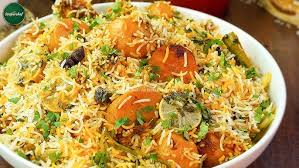

In [ ]:
import PIL.Image

img = PIL.Image.open('/content/biyani.jfif')
img

In [ ]:
# ============ PROMPT 8:Biryani description in 3 parts overview, main details, sammary ====================

from PIL import Image
from IPython.display import Markdown, display

# Load the image
img = Image.open("/content/biyani.jfif")

# Define model
model = genai.GenerativeModel("gemini-2.5-pro")

# Define prompt
prompt = """
You are an expert AI visual analyst.
Look at the image and describe it clearly in 3 parts:
1. **Overview** – what the image is about in 1-2 lines.
2. **Main Details** – key visual features, colors, objects, or people.
3. **Summary** – what message, mood, or meaning the image conveys.
Use Markdown formatting with bold headings.
Keep response under 200 words.
"""

# Generate response using image + text prompt
response = model.generate_content([prompt, img])

# Print formatted description
display(Markdown(response.text))

ERROR:tornado.access:503 POST /v1beta/models/gemini-2.5-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (::1) 18466.71ms


**Overview**
This is a close-up, appetizing photograph of a freshly prepared bowl of biryani, a popular and aromatic mixed rice dish from South Asia.

**Main Details**
The dish is served in a white bowl and features fluffy, long-grain basmati rice with distinct white, yellow, and orange grains. Mixed throughout are tender, golden-brown potatoes, slices of lime, and whole green chilies. The biryani is generously garnished with freshly chopped green cilantro, adding a vibrant contrast. The overall presentation is rich and textured.

**Summary**
The image conveys warmth, tradition, and rich flavor. It is designed to be visually appealing and to evoke a sense of a delicious, hearty, and satisfying meal, likely highlighting a specific recipe or restaurant's offering.

In [ ]:
# ============ PROMPT 9: Generate Recipe from Dish Image (Biryani) ====================

from PIL import Image
from IPython.display import Markdown, display

# Load the image
img = Image.open("/content/biyani.jfif")

# Define model
model = genai.GenerativeModel("gemini-2.5-pro")

# Define prompt
prompt = """
You are a professional chef and AI food expert.
Look carefully at the given image of the dish and generate a detailed recipe based on what you see.

Write the recipe in clear sections:
1. **Dish Name** – Identify the most likely name of the dish.
2. **Overview** – Briefly describe what the dish is and its regional origin.
3. **Ingredients** – List all possible ingredients (with approximate quantities if possible).
4. **Instructions** – Write step-by-step cooking instructions to make this dish.
5. **Serving & Presentation Tips** – Explain how it is typically served or garnished.

Use Markdown formatting with clear section headings.
Keep the recipe under 250 words.
Be realistic and relevant to what is visible in the image.
"""

# Generate response using image + text prompt
response = model.generate_content([prompt, img])

# Print formatted description
display(Markdown(response.text))


Of course! Based on the image, here is a professional recipe for this delicious dish.

### **1. Dish Name**
Aloo Biryani (Potato Biryani)

### **2. Overview**
Aloo Biryani is a fragrant and popular vegetarian layered rice dish from the Indian subcontinent. It features fluffy, long-grain Basmati rice and tender potatoes cooked in a blend of aromatic spices. The "dum" cooking method, where the dish is slow-steamed, allows the flavors to meld together beautifully.

### **3. Ingredients**
*   **For the Rice:** 2 cups Basmati rice, 2-3 green cardamoms, 2 cloves, 1 small cinnamon stick.
*   **For the Potato Masala:** 500g small potatoes (peeled), 1 large onion (thinly sliced), 1 tbsp ginger-garlic paste, ½ cup plain yogurt, 2 tsp biryani masala powder, ½ tsp turmeric powder, salt to taste, 3 tbsp oil or ghee.
*   **Garnish:** Freshly chopped cilantro, 2-3 green chilies, 1 lime (cut into wedges).

### **4. Instructions**
1.  Wash and soak the Basmati rice for 30 minutes. Boil it with whole spices until it's 70% cooked, then drain and set aside.
2.  In a heavy-bottomed pot, heat oil/ghee and fry the onions until golden brown.
3.  Add the ginger-garlic paste, potatoes, yogurt, and powdered spices. Sauté for 5 minutes, then add a splash of water and cook until the potatoes are almost tender.
4.  Layer the par-cooked rice over the potato masala. Top with cilantro and green chilies.
5.  Cover the pot tightly and cook on very low heat ("dum") for 15-20 minutes until the rice is fully cooked and fluffy.

### **5. Serving & Presentation Tips**
Gently fluff the biryani with a fork before serving. Garnish with a generous amount of fresh cilantro and place lime wedges on top for squeezing. This dish is traditionally served hot, often accompanied by a cooling yogurt dip called *raita*.

###Pizza Dish

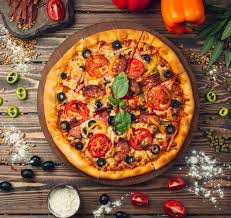

In [ ]:
img = PIL.Image.open('/content/pizaa.jfif')
img

In [ ]:
# ============ PROMPT 10: Ingredient Recognition of Pizza ====================

from PIL import Image
from IPython.display import Markdown, display

# Load the image
img = Image.open("/content/pizaa.jfif")

# Define model
model = genai.GenerativeModel("gemini-2.5-pro")

# Define prompt
prompt = """
Identify all visible ingredients in this pizza image.
List them under categories:
- **Main ingredients**
- **Spices**
- **Garnish**
Describe each briefly (e.g., texture, color, role in dish).
"""

# Generate response using image + text prompt
response = model.generate_content([prompt, img])

# Print formatted description
display(Markdown(response.text))

ERROR:tornado.access:503 POST /v1beta/models/gemini-2.5-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (::1) 6972.40ms
ERROR:tornado.access:503 POST /v1beta/models/gemini-2.5-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (::1) 4844.45ms


Of course! Based on the image, here are the visible ingredients categorized and described.

### **Main Ingredients**

*   **Pizza Dough (Crust)**
    *   **Description:** This forms the base of the pizza. It's golden-brown with a slightly puffy, crisp-looking edge (the cornicione). It serves as the foundation for all other toppings.
*   **Cheese (likely Mozzarella)**
    *   **Description:** A layer of melted, bubbly cheese with golden-brown spots covers the base. Its color is primarily off-white to light yellow. It provides a creamy texture and a rich, savory flavor.
*   **Tomato Slices**
    *   **Description:** Bright red, round slices of fresh tomato are distributed across the pizza. They appear soft and juicy, adding a fresh, slightly acidic taste to contrast the richness of the cheese and meat.
*   **Sausage / Pepperoni**
    *   **Description:** These are reddish-brown, circular slices of cured meat. They appear slightly crisped from the oven and contribute a savory, salty, and often spicy flavor.
*   **Ham / Bacon**
    *   **Description:** Lighter pink, irregularly shaped pieces of meat are visible beneath the cheese and other toppings. This adds a smoky, salty flavor and a chewy texture.
*   **Black Olives**
    *   **Description:** Sliced into dark black rings, these olives are scattered across the pizza. They provide a distinct, briny, and salty flavor with a firm texture.

### **Spices**

*   **Flour / Semolina**
    *   **Description:** The white powder sprinkled on the wooden surface is likely flour or semolina, used to prevent the dough from sticking during preparation. It is not a flavor spice but a functional component in baking.

### **Garnish**

*   **Fresh Basil**
    *   **Description:** Several vibrant green leaves are placed in the center of the pizza. This fresh herb adds a bright, aromatic, and slightly peppery flavor that cuts through the richness of the other ingredients.
*   **Grated Parmesan Cheese**
    *   **Description:** A small bowl of finely grated white cheese is on the table. This is likely Parmesan, intended for sprinkling on top of the finished pizza to add a sharp, salty, and nutty flavor.

In [ ]:
# ============ PROMPT 11: Describe Pizza Flavor, Aroma & Taste from Image  ====================

from PIL import Image
from IPython.display import Markdown, display

# Load the image
img = Image.open("/content/pizaa.jfif")

# Define model
model = genai.GenerativeModel("gemini-2.5-pro")

# Define prompt
prompt = """
You are a food critic. Look at the pizza image and write a short, sensory flavor description in Markdown.
Include:
## Visual Impression
Describe the crust, toppings, cheese texture, and color.
## Aroma
Explain the likely aroma using descriptive, sensory language (e.g., cheesy, smoky, herby).
## Flavor & Texture
Describe the overall taste, dominant flavors, and texture balance.
Keep it under 120 words.
Use bold for key flavor words.
Avoid emojis and maintain professional tone.
Keep tone poetic and sensory-rich.
"""

# Generate response using image + text prompt
response = model.generate_content([prompt, img])

# Print formatted description
display(Markdown(response.text))

## Visual Impression
A rustic, golden-brown crust cradles a vibrant mosaic of toppings. Melted cheese blankets the surface in creamy waves, punctuated by jewel-like tomatoes, glossy black olives, and savory cured meats. A fresh basil sprig provides a verdant centerpiece.

## Aroma
The air carries a warm, **yeasty** scent from the hearth, mingled with the **savory**, slightly **smoky** aroma of cured meat and the rich scent of toasted cheese. A bright, **herby** note of basil cuts through the richness.

## Flavor & Texture
Each bite promises a delightful contrast: a crisp-edged, chewy crust yields to a soft interior. Flavors of **salty** salami and **briny** olive are balanced by sweet tomato and fresh basil. The gooey, **milky** cheese unifies this rustic, satisfying composition.

###Burger Dish

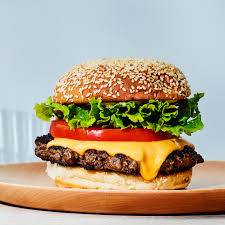

In [ ]:
img = PIL.Image.open('/content/burger.jfif')
img

In [ ]:
# ============ PROMPT 12: Instagram Caption Generator of Burger ====================

from PIL import Image
from IPython.display import Markdown, display

# Load the image
img = Image.open("/content/burger.jfif")

# Define model
model = genai.GenerativeModel("gemini-2.5-pro")

# Define prompt
prompt = """
You are a social media food blogger.
Look at the burger image and write 3 catchy Instagram captions with emojis and hashtags.
Each caption should sound delicious and engaging.
Example tone: “Weekend vibes with this aromatic burger ”
"""

# Generate response using image + text prompt
response = model.generate_content([prompt, img])

# Print formatted description
display(Markdown(response.text))

Of course! As a food blogger, here are 3 catchy Instagram captions for that delicious-looking burger:

**Caption 1 (Focus on Cravings)**

Now THIS is what I call a masterpiece! 🍔 That perfectly juicy patty, the glorious cheese melt, and fresh toppings all hugged by a toasted sesame bun. I'm not drooling, you are! 🤤 What's the first word that comes to mind when you see this?

#BurgerPerfection #Cheeseburger #Foodgasm #InstaFood #BurgerLove #MeltedCheese #JuicyBurger #FoodBlogger

---

**Caption 2 (Focus on the Mood)**

Hello, beautiful! ✨ This burger is solving all of life's problems, one bite at a time. It’s the ultimate comfort food classic, done just right. Who would you share this with? Tag your burger buddy below! 👇

#LunchGoals #BurgerTime #Foodie #EatFamous #ComfortFood #WeekendVibes #TagAFriend #Delicious

---

**Caption 3 (Focus on the Details)**

Let’s talk about layers of happiness. ✅ A crispy-edged patty, gooey American cheese, a juicy tomato slice, and crisp lettuce creating the perfect bite. Sometimes, the simple things are the most satisfying. 🙌 What's your must-have burger topping?

#BurgerGoals #ClassicBurger #CheeseMelt #FoodPhotography #WhatsForDinner #Eats #FoodLover #Yummy

In [ ]:
# ============ PROMPT 11: Burger Menu Description ====================

from PIL import Image
from IPython.display import Markdown, display

# Load the image
img = Image.open("/content/burger.jfif")

# Define model
model = genai.GenerativeModel("gemini-2.5-pro")

# Define prompt
prompt = """
You are writing for a restaurant menu.
Create a short, appealing menu description for this burger dish.
Tone: mouth-watering, elegant, under 60 words.
Include 2–3 emojis and highlight flavors like 'spicy', 'aromatic', or 'royal'.
"""

# Generate response using image + text prompt
response = model.generate_content([prompt, img])

# Print formatted description
display(Markdown(response.text))

Here are a few options:

**Option 1 (Elegant & Royal):**
Behold The Royal Classic. 👑 A majestic, flame-grilled patty is crowned with rich, melted cheddar and crisp greens on a toasted sesame bun. A truly *royal* burger experience, simple in its perfection. 🍔✨

**Option 2 (Flavor-focused):**
Savor our signature cheeseburger! A juicy, seared patty meets velvety cheddar, farm-fresh lettuce, and ripe tomato. Served on a toasted, *aromatic* sesame bun for a mouth-watering bite every time. 🍔😋

###Cake

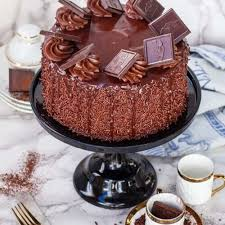

In [ ]:
img = PIL.Image.open('/content/cake.jfif')
img

In [ ]:
# ============ PROMPT 12: Generate Cake Recipe from Image  ====================

from PIL import Image
from IPython.display import Markdown, display

# Load the image
img = Image.open('/content/cake.jfif')

# Define model
model = genai.GenerativeModel("gemini-2.5-pro")

# Define prompt
prompt = """
You are a professional pastry chef.
Look at the cake image carefully and write a well-formatted recipe in Markdown.

Include:
# Dish Name
## Overview
Shortly describe the cake type and flavor (e.g., chocolate fudge, vanilla cream).
## Ingredients
List possible ingredients with approximate amounts.
## Instructions
Step-by-step preparation and baking process.
## Serving Tips
How to serve or decorate it attractively.

Keep it under 200 words.
Use bold for key ingredients and clear headings.
Avoid emojis.
"""

# Generate response using image + text prompt
response = model.generate_content([prompt, img])

# Print formatted description
display(Markdown(response.text))

# Decadent Chocolate Ganache Cake

## Overview
A classic, multi-layered chocolate fudge cake. This dessert features a moist chocolate sponge, rich ganache frosting, and a glossy glaze, all finished with fine chocolate sprinkles for a truly indulgent experience.

## Ingredients
*   **Cake:** 250g **all-purpose flour**, 75g **unsweetened cocoa powder**, 300g sugar, 3 large eggs, 200ml buttermilk, 200ml hot coffee.
*   **Frosting & Glaze:** 400g **dark chocolate** (chopped), 300ml **heavy cream**, 150g unsalted butter.
*   **Decoration:** 100g **chocolate sprinkles**, small chocolate bars.

## Instructions
1.  Whisk dry cake ingredients. In a separate bowl, mix wet ingredients, then combine and add hot coffee. Bake in two 8-inch pans at 175°C (350°F) for 30-35 minutes. Cool completely.
2.  To make the ganache, gently heat the **heavy cream** and pour it over the **dark chocolate**. Let it sit for 5 minutes, then stir until smooth and glossy. Cool.
3.  Whip the butter until fluffy, then gradually beat in three-quarters of the cooled ganache to create the frosting.
4.  Assemble the layers with the frosting. Press **chocolate sprinkles** onto the sides.
5.  Gently re-warm the remaining ganache and pour it over the top of the cake, allowing it to drip slightly down the sides.

## Serving Tips
Decorate with piped rosettes of leftover frosting and place small chocolate bars on top. Serve at room temperature to ensure a soft texture. A cup of espresso perfectly complements its richness.

In [ ]:
# ============ PROMPT 13: Describe Cake Flavor, Texture & Presentation  ===========

from PIL import Image
from IPython.display import Markdown, display

# Load the image
img = Image.open('/content/cake.jfif')

# Define model
model = genai.GenerativeModel("gemini-2.5-pro")

# Define prompt
prompt = """
You are a dessert critic.
Look at the cake image and write a short, engaging flavor description in Markdown.

Include:
## Visual Impression
Describe the cake’s layers, frosting, colors, and presentation.
## Flavor & Texture
Explain how it might taste—mention sweetness, richness, softness, or crunch.
## Overall Feel
Summarize the mood or vibe (e.g., elegant, festive, comforting).

Keep it under 120 words.
Use bold for key flavor words.
Write in a professional yet appetizing tone.
"""

# Generate response using image + text prompt
response = model.generate_content([prompt, img])

# Print formatted description
display(Markdown(response.text))

## Visual Impression
This dessert is a stunning tribute to chocolate. A lustrous, mirror-like ganache covers the top, adorned with piped rosettes and elegant chocolate squares. The sides are generously coated in fine chocolate sprinkles, creating a beautifully textured, uniform finish.

## Flavor & Texture
One can anticipate a profoundly **rich**, multi-layered chocolate flavor. The cake promises a **soft**, moist crumb, complemented by **creamy** frosting and a **smooth** ganache. The chocolate adornments and sprinkles offer a delicate **crunch**, providing a delightful textural contrast.

## Overall Feel
Elegant and celebratory. This is a cake for the true chocolate aficionado, exuding a sense of sophisticated indulgence perfect for any special occasion.

##*Compare 4 Dish Images (Burger, Pizza, Biryani, Cake)*

In [ ]:
# ============ PROMPT 14: Compare 4 Dish Images (Burger, Pizza, Biryani, Cake) ====================

from PIL import Image
from IPython.display import Markdown, display
img_burger = Image.open("/content/burger.jfif")
img_pizza = Image.open("/content/pizaa.jfif")
img_biryani = Image.open('/content/biyani.jfif')
img_cake = Image.open('/content/cake.jfif')

model = genai.GenerativeModel("gemini-2.5-pro")

prompt = """
You are a professional food critic and visual AI.
Compare the four dish images provided (burger, pizza, biryani, and cake).

Write a well-structured Markdown comparison including:
1. **Overview** – What types of dishes are shown and their categories.
2. **Visual Comparison** – Compare color, plating, texture, and presentation.
3. **Flavor & Texture** – Compare likely flavor profiles and mouthfeel.
4. **Cultural & Mood Vibe** – What emotion or setting each dish represents.
5. **Summary Table** – Include a Markdown table summarizing all dishes.

Keep under 250 words.
Use bold for important flavor or texture words.
Do not add emojis inside text, only in headings if needed.
"""

response = model.generate_content([prompt, img_burger, img_pizza, img_biryani, img_cake])
display(Markdown(response.text))

ERROR:tornado.access:503 POST /v1beta/models/gemini-2.5-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (::1) 2456.95ms
ERROR:tornado.access:503 POST /v1beta/models/gemini-2.5-pro:generateContent?%24alt=json%3Benum-encoding%3Dint (::1) 3158.47ms


### A Culinary Quartet 🍽️

#### Overview
This selection presents a global culinary tour, featuring an American burger and an Italian pizza as savory mains, a South Asian biryani as a complex rice dish, and a decadent chocolate cake for dessert. Each represents a distinct category of dining, from casual comfort food to celebratory indulgence.

#### Visual Comparison
The burger's presentation is clean and vertically stacked, showcasing fresh, vibrant ingredients. In contrast, the pizza is a rustic, colorful medley served flat on a wooden board. The biryani is a bountiful, golden-hued mix in a bowl, appearing warm and inviting. The chocolate cake stands elegant and monochromatic, its rich, dark textures promising decadence on a formal stand.

#### Flavor & Texture
The burger offers a **smoky**, **savory** patty with **crisp** lettuce and a **soft** bun. The pizza combines **tangy** tomato, **salty** toppings, and a **chewy** crust. The biryani is likely **aromatic** and **spicy**, with **fluffy** rice and **tender** potatoes. The cake promises a **rich**, **sweet** chocolate experience with a **moist** crumb and **creamy** frosting.

#### Cultural & Mood Vibe
The burger evokes a casual, satisfying meal. The pizza is social and perfect for sharing with friends. Biryani suggests a festive, communal gathering rich in tradition. The cake is purely celebratory and indulgent, marking a special occasion.

#### Summary Table

| Dish | Category | Key Flavors | Vibe |
|---|---|---|---|
| Burger | Main / Fast Food | Savory, Smoky | Casual, Satisfying |
| Pizza | Main / Shared | Tangy, Salty | Social, Communal |
| Biryani | Main / Rice Dish | Aromatic, Spicy | Festive, Traditional |
| Cake | Dessert | Rich, Sweet | Celebratory, Indulgent |